# MANTENIMIENTO PREDICTIVO EN MOTORES DE AVIÓN

# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import joblib



In [2]:
df= pd.read_csv('../data/processed/datos_norm_limpios.csv', delimiter=',')

df

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
0,1,1,0.183735,0.406802,0.309757,0.726248,0.242424,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,191.0,0,0
1,1,2,0.283133,0.453019,0.352633,0.628019,0.212121,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,190.0,0,0
2,1,3,0.343373,0.369523,0.370527,0.710145,0.272727,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,189.0,0,0
3,1,4,0.343373,0.256159,0.331195,0.740741,0.318182,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,188.0,0,0
4,1,5,0.349398,0.257467,0.404625,0.668277,0.242424,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,187.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [3]:
class_counts = df['label2'].value_counts()
class_counts

label2
0    17531
2     1600
1     1500
Name: count, dtype: int64

Después de ver las predicciones para label2 se intentam mejorar quitando datos en los que label2=0. Se elige quitar un porcentaje de cada ID (motor) del comienzo de los datos.

Se prueba con diferentes porcentajes y se elige lo siguiente:

In [17]:
df['cumcount'] = df.groupby('id').cumcount()
df_filtered = df[df['cumcount'] >= df['cumcount'].max() * 0.3]
df_filtered = df_filtered.drop(columns='cumcount')
df_filtered

,id,cycle,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21,RUL,label1,label2
109,1,110,0.403614,0.413560,0.321067,0.681159,0.348485,0.416667,0.707889,0.352941,0.140469,0.534436,0.416667,0.713178,0.553576,82.0,0,0
110,1,111,0.439759,0.290822,0.436529,0.586151,0.333333,0.458333,0.605544,0.382353,0.167510,0.460947,0.333333,0.604651,0.440900,81.0,0,0
111,1,112,0.436747,0.336167,0.330689,0.537842,0.242424,0.220238,0.684435,0.294118,0.162968,0.460177,0.500000,0.542636,0.588926,80.0,0,0
112,1,113,0.442771,0.431873,0.410871,0.492754,0.303030,0.363095,0.652452,0.411765,0.151615,0.512120,0.416667,0.589147,0.574289,79.0,0,0
113,1,114,0.331325,0.378897,0.349764,0.714976,0.257576,0.434524,0.637527,0.397059,0.167303,0.400539,0.500000,0.581395,0.664457,78.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,4.0,1,2
20627,100,197,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,3.0,1,2
20628,100,198,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,2.0,1,2
20629,100,199,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,1.0,1,2


In [18]:
class_counts = df_filtered['label2'].value_counts()
class_counts

label2
0    6654
2    1600
1    1477
Name: count, dtype: int64

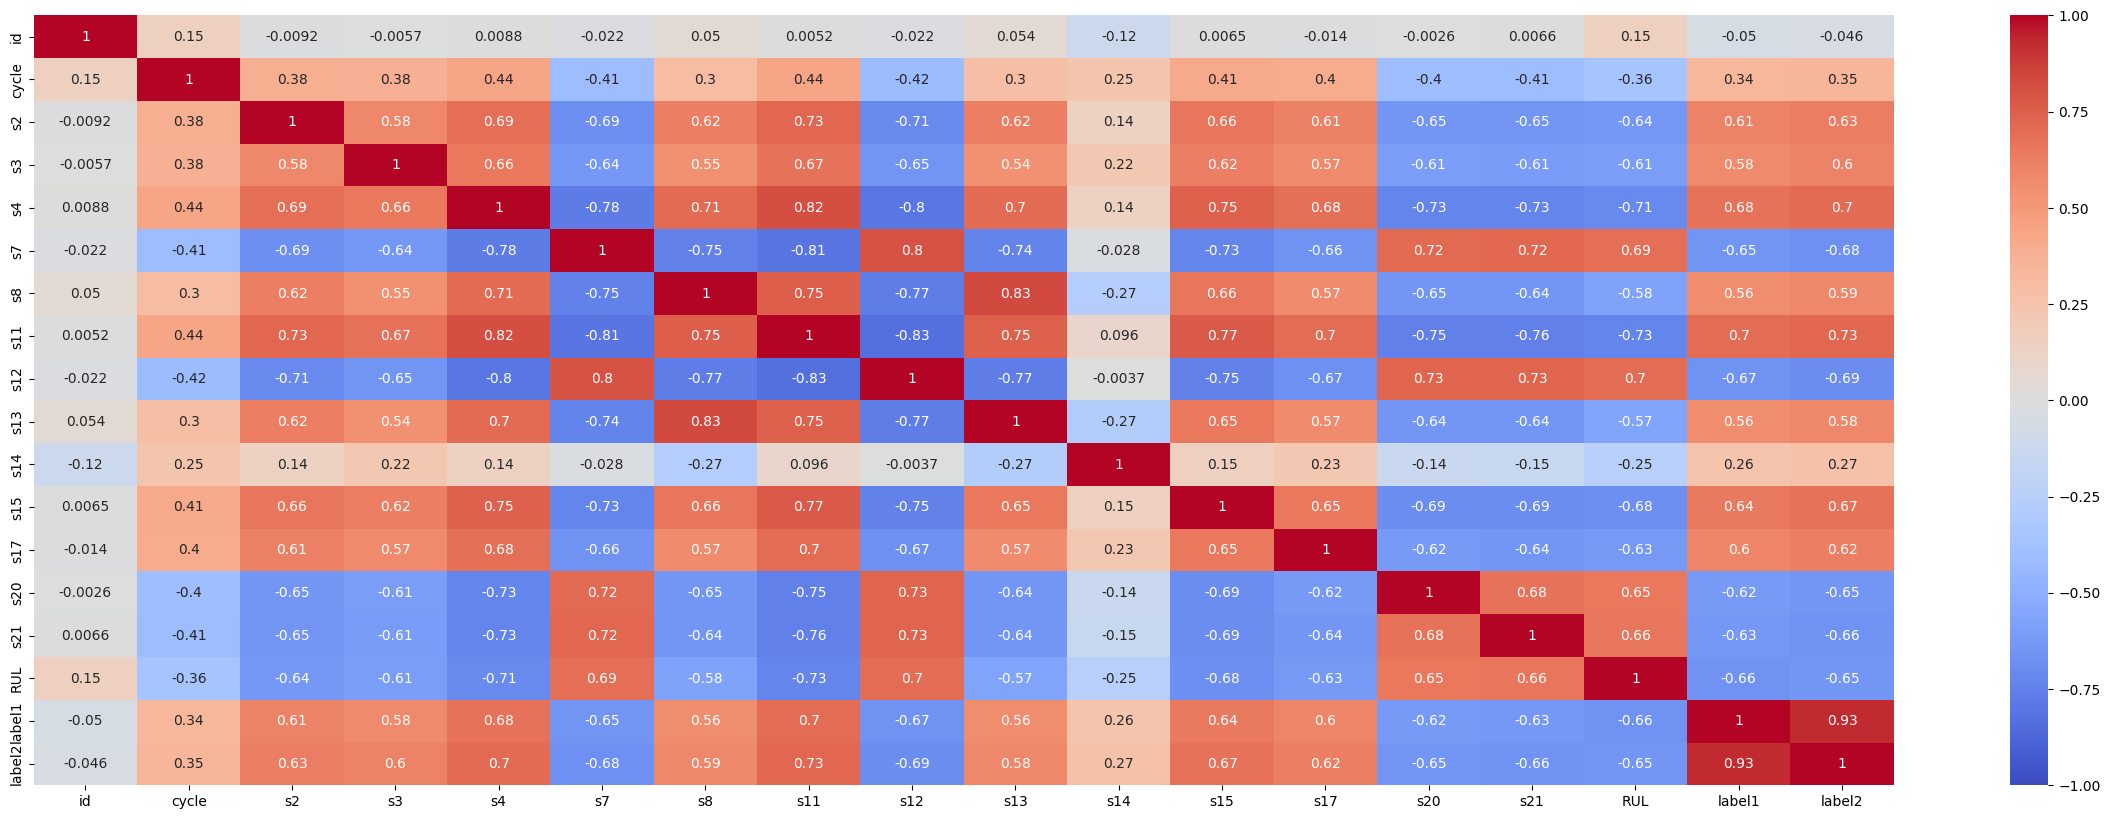

In [19]:
plt.figure(figsize=[30,10])
sns.heatmap (df_filtered.corr(numeric_only=True), annot=True, cmap='coolwarm', vmin=-1);

In [20]:
X = df_filtered.drop(columns=['id', 'cycle', 'label1', 'label2', 'RUL'])
y = df_filtered['label2']

In [21]:
X

,s2,s3,s4,s7,s8,s11,s12,s13,s14,s15,s17,s20,s21
109,0.403614,0.413560,0.321067,0.681159,0.348485,0.416667,0.707889,0.352941,0.140469,0.534436,0.416667,0.713178,0.553576
110,0.439759,0.290822,0.436529,0.586151,0.333333,0.458333,0.605544,0.382353,0.167510,0.460947,0.333333,0.604651,0.440900
111,0.436747,0.336167,0.330689,0.537842,0.242424,0.220238,0.684435,0.294118,0.162968,0.460177,0.500000,0.542636,0.588926
112,0.442771,0.431873,0.410871,0.492754,0.303030,0.363095,0.652452,0.411765,0.151615,0.512120,0.416667,0.589147,0.574289
113,0.331325,0.378897,0.349764,0.714976,0.257576,0.434524,0.637527,0.397059,0.167303,0.400539,0.500000,0.581395,0.664457
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,0.686747,0.587312,0.782917,0.254428,0.439394,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,0.701807,0.729453,0.866475,0.162641,0.500000,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,0.665663,0.684979,0.775321,0.175523,0.515152,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,0.608434,0.746021,0.747468,0.133655,0.530303,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(X_train.shape)
print(X_test.shape)

(7784, 13)
(1947, 13)


In [23]:
# Escalar las variables (muy recomendado para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

ENTRENAR MODELO

In [24]:
from sklearn.svm import SVC

# Crear el modelo SVM (clasificación múltiple por defecto con 'ovr')
svm_model = SVC(kernel='rbf', random_state=42)

# Entrenar
svm_model.fit(X_train_scaled, y_train)


,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


EVALUAR EL MODELO

In [25]:
from sklearn.metrics import classification_report, confusion_matrix

# Predecir sobre test
y_pred = svm_model.predict(X_test_scaled)


print(classification_report(y_test, y_pred, digits=3))

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)



              precision    recall  f1-score   support

           0      0.912     0.972     0.941      1339
           1      0.667     0.467     0.549       304
           2      0.860     0.868     0.864       304

    accuracy                          0.877      1947
   macro avg      0.813     0.769     0.785      1947
weighted avg      0.866     0.877     0.868      1947

Confusion Matrix:
[[1302   35    2]
 [ 121  142   41]
 [   4   36  264]]


MATRIZ DE CONFUSION

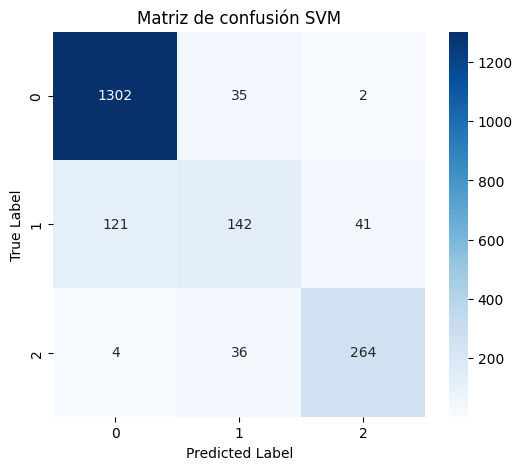

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de confusión SVM')
plt.show()


GUARDAR EL MODELO

In [27]:
# Guardar el modelo
joblib.dump(svm_model, "../models/modelo_SVM.pkl")

# Guardar el escalador
joblib.dump(scaler, "../models/scaler_SVM.pkl")


['../models/scaler_SVM.pkl']

CURVE ROC

In [28]:
from sklearn.metrics import roc_curve, roc_auc_score  


probas = svm_model.predict_proba(X_test)  # shape (n_samples, 3)

# ROC AUC global (One-vs-Rest) y curvas por clase
auc_score = roc_auc_score(y_test, probas, multi_class='ovr')  
print(f"ROC AUC (multiclass OvR): {auc_score:.3f}")

# Curvas individuales
fpr = dict()
tpr = dict()
n_classes = probas.shape[1]  
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, probas[:, i])

# curvas ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'Clase {i} ROC (AUC = {auc_score:.3f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0]); plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curvas ROC – Regresión Logística (multiclase)')
plt.legend(loc='lower right')
plt.show()


AttributeError: This 'SVC' has no attribute 'predict_proba'